# NB - Twitter 

In [8]:
import sys
import os
import pandas as pd

# Agregar el directorio raiz al PYTHONPATH
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

Importar modelo NB y cargar datos

In [9]:
from src.trainers.train_nb import train_nb
from src.trainers.utils import build_datasets, save_metrics
from constants.constants_twitter import TWITTER_DATASET_TRAIN_PATH

dataset_train, dataset_test, dataset_val = build_datasets(
    TWITTER_DATASET_TRAIN_PATH,
    test_size=0.3,
    val_size=0.5, # 0.5 de 0.3    
    random_state=42
)
print(dataset_train.shape)
print(dataset_test.shape)
print(dataset_val.shape)

Train: 62.08%
Test: 13.30%
Val: 13.30%
(36924, 2)
(7912, 2)
(7913, 2)


## Hiperparámetros

In [10]:
import numpy as np

list_vectorizers = ["tfidf", "bow"]
list_alpha = np.logspace(-4, 1, 20)
print(list_alpha)

[1.00000000e-04 1.83298071e-04 3.35981829e-04 6.15848211e-04
 1.12883789e-03 2.06913808e-03 3.79269019e-03 6.95192796e-03
 1.27427499e-02 2.33572147e-02 4.28133240e-02 7.84759970e-02
 1.43844989e-01 2.63665090e-01 4.83293024e-01 8.85866790e-01
 1.62377674e+00 2.97635144e+00 5.45559478e+00 1.00000000e+01]


## Entrenar modelos

In [11]:
from constants.constants_twitter import NB_PIPELINE_PATH, TWITTER_NB_METRICS_PATH
from src.trainers.utils import save_model

best_accuracy = -1
for vectorizer in list_vectorizers:
    for alpha in list_alpha:
        pipeline, metrics = train_nb(
            dataset_train,
            dataset_val,
            alpha=alpha,
            vec=vectorizer
        )
        print(f"[NB {vectorizer} {alpha:.5f}] acc: {metrics['accuracy']:.4f}")
        save_metrics(metrics, TWITTER_NB_METRICS_PATH)
        if metrics['accuracy'] > best_accuracy:
            best_accuracy = metrics['accuracy']
            save_model(pipeline, NB_PIPELINE_PATH)
            

[NB tfidf 0.00010] acc: 0.7981
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\nb_pipeline.pkl
[NB tfidf 0.00018] acc: 0.7982
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\nb_pipeline.pkl
[NB tfidf 0.00034] acc: 0.7979
[NB tfidf 0.00062] acc: 0.7978
[NB tfidf 0.00113] acc: 0.7974
[NB tfidf 0.00207] acc: 0.7974
[NB tfidf 0.00379] acc: 0.7973
[NB tfidf 0.00695] acc: 0.7984
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\nb_pipeline.pkl
[NB tfidf 0.01274] acc: 0.7977
[NB tfidf 0.02336] acc: 0.7968
[NB tfidf 0.04281] acc: 0.7948
[NB tfidf 0.07848] acc: 0.7933
[NB tfidf 0.14384] acc: 0.7887
[NB tfidf 0.26367] acc: 0.7833
[NB tfidf 0.48329] acc: 0.7739
[NB tfidf 0.88587] acc: 0.7619
[NB tfidf 1.62378] acc: 0.7508
[NB tfidf 2.97635] acc: 0.7393
[NB tfidf 5.45559] acc: 0.7270
[NB tfidf 10.00000] acc: 0.7139
[NB bow 0.00010] acc: 0.7782
[NB bow 0.00018] acc: 0.7781
[NB bo

## Modelo con mayor accuracy

In [12]:
# Seleccionar los hiperparámetros que generan mayor accuracy
df_metrics = pd.read_csv(TWITTER_NB_METRICS_PATH)

best_acc = df_metrics.loc[df_metrics['accuracy'].idxmax()]
print(best_acc)
print(best_accuracy)

accuracy      0.798433
recall        0.798436
precision     0.799726
f1_score      0.798372
model               NB
vectorizer       tfidf
alpha         0.006952
vocab_size       11819
train_time    0.490154
Name: 7, dtype: object
0.7984329584228484


Cargando modelo: c:\Users\Diego\Desktop\sentiment_analysis\models\twitter\classifiers\nb_pipeline.pkl

Naive Bayes
Reporte de clasificacion
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2749
           1       0.76      0.82      0.79      2447
           2       0.83      0.80      0.81      2716

    accuracy                           0.80      7912
   macro avg       0.80      0.80      0.80      7912
weighted avg       0.80      0.80      0.80      7912

Matriz de confusión


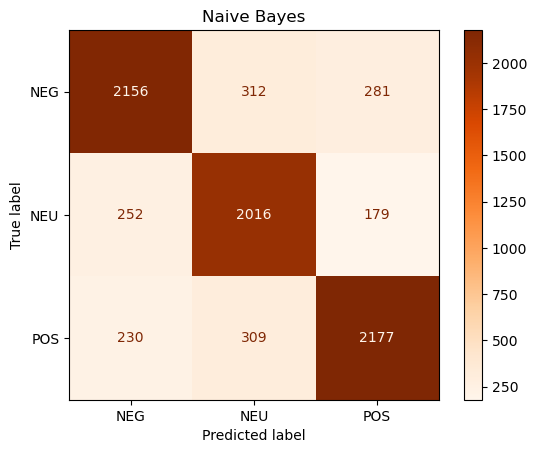

{'accuracy': 0.8024519716885743,
 'recall': 0.8024500965968154,
 'precision': 0.8032325148950358,
 'f1_score': 0.8022991706785495}

In [13]:
from src.trainers.utils import evaluate_model
from src.trainers.utils import load_model

# Evaluar modelo con datos de prueba
pipeline = load_model(NB_PIPELINE_PATH)
metrics = evaluate_model(pipeline, dataset_test, title="Naive Bayes")
display(metrics)

## Test

In [7]:
from constants.constants_nlp import INDEX_TO_POLARITY
from src.preprocesamiento.clean import clean_text
from src.preprocesamiento.nlp_spacy import preprocesamiento

textos_test = ["i'm study hard", "i'm happy"]
textos_test = list(map(lambda x: clean_text(x, "en"), textos_test))
textos_test = preprocesamiento(textos_test, stemming=True, lang="en")

preds = pipeline.predict(textos_test)
for input, pred in zip(textos_test,preds):
    print(f"{input}: {INDEX_TO_POLARITY[pred]}")

Modelo cargado: en_core_web_sm
Aplicando stemming...
Total de documentos preprocesados: 2
m studi hard: NEU
m happi: POS
